# Latent Diritchet Allocation

---

## Topic Modeling - Unsupervised Learning

Leer documentos no etiquetados y obtener un listado de posibles tópicos de manera no supervisada

In [1]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel, LdaMulticore
import nltk
import numpy as np
import spacy
from document import Document
import pandas as pd
import util.log as log
log.init_logger()
from util.graphics.word_cloud import show_word_cloud
from util.graphics.bar import show_bar_graphic
from repository.csv_tools import get_documents, get_data

In [2]:
documents = get_documents('../data/dataset.csv')
preprocessed_docs = [document.lemmatized_string for document in documents]

In [3]:
id2token = gensim.corpora.Dictionary(preprocessed_docs)

In [4]:
id2token.filter_extremes(no_below=5, no_above=0.5)
bag_of_words = [id2token.doc2bow(doc) for doc in preprocessed_docs]
bag_of_words_tf_dif = TfidfModel(bag_of_words)[bag_of_words]

In [5]:
lda_model = LdaMulticore(bag_of_words, num_topics=14, id2word=id2token, passes=100, workers=10, iterations = 100, random_state=0)

In [6]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {}\nWords: {}\n'.format(idx, topic))

Topic: 0
Words: 0.001*"preguntar" + 0.001*"consumidor" + 0.001*"coeficiente" + 0.001*"adoptar" + 0.001*"innovador" + 0.001*"tp" + 0.001*"modelo" + 0.001*"individuo" + 0.001*"boca" + 0.001*"activo"

Topic: 1
Words: 0.047*"largo" + 0.046*"cola" + 0.021*"ofrecer" + 0.017*"regla" + 0.016*"cliente" + 0.015*"venta" + 0.014*"demanda" + 0.014*"nicho" + 0.010*"oferta" + 0.010*"tienda"

Topic: 2
Words: 0.040*"venta" + 0.031*"usuario" + 0.030*"commerce" + 0.023*"com" + 0.023*"fuente" + 0.018*"comercio" + 0.016*"unidos" + 0.016*"www" + 0.015*"minorista" + 0.014*"porcentaje"

Topic: 3
Words: 0.017*"coste" + 0.012*"tarea" + 0.011*"compartir" + 0.010*"red" + 0.010*"concepto" + 0.010*"favorecer" + 0.010*"precio" + 0.010*"global" + 0.009*"colaborativa" + 0.008*"ley"

Topic: 4
Words: 0.068*"cliente" + 0.025*"marca" + 0.024*"social" + 0.015*"comunidad" + 0.012*"conectividad" + 0.011*"horizontal" + 0.010*"precio" + 0.010*"mundo" + 0.010*"red" + 0.009*"concepto"

Topic: 5
Words: 0.073*"cliente" + 0.073*"ex

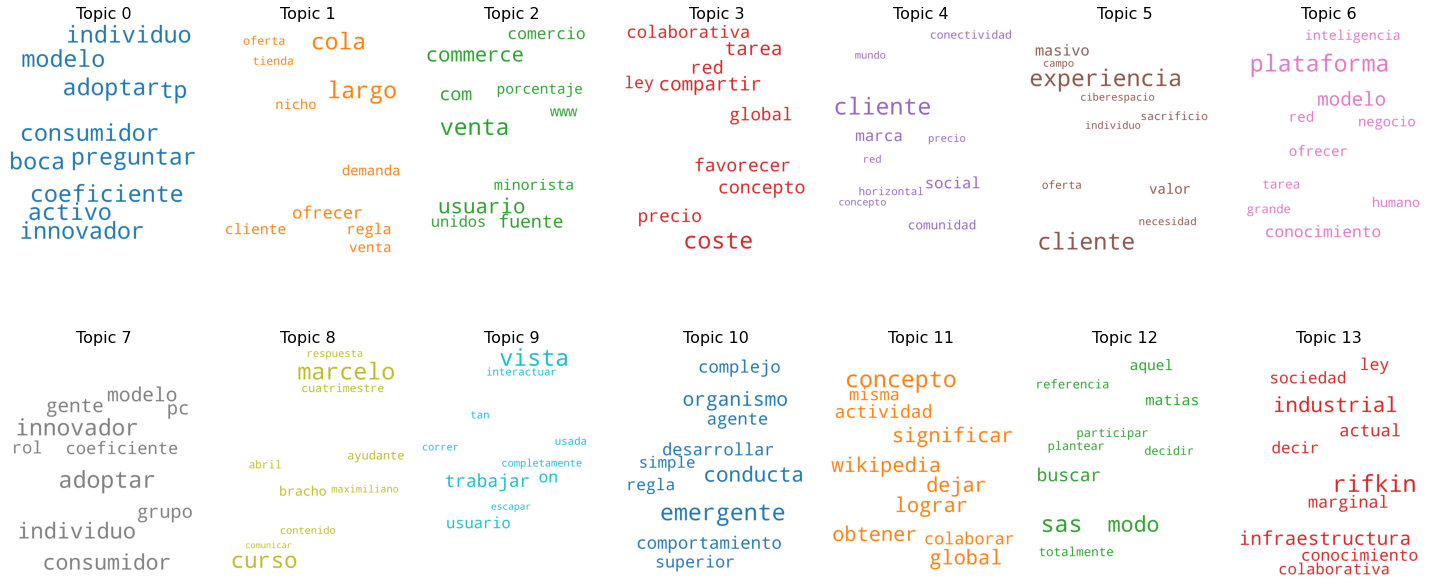

In [7]:
show_word_cloud(lda_model, rows = 2, columns = 7)

In [8]:
def get_topic(model, bow):
    possible_topics = model[bow]
    max = 0
    pmax = 0

    for topic, probability in possible_topics:
        if probability > pmax:
            max = topic
            pmax = probability

    return max 


def get_dictionary(model, bag_of_words):
    topic_counts = {}
    for i in range(len(model.print_topics())):
        topic_counts['{}'.format(i)] = 0

    for bag in bag_of_words:
        topic_counts['{}'.format(get_topic(model, bag))] += 1

    return topic_counts

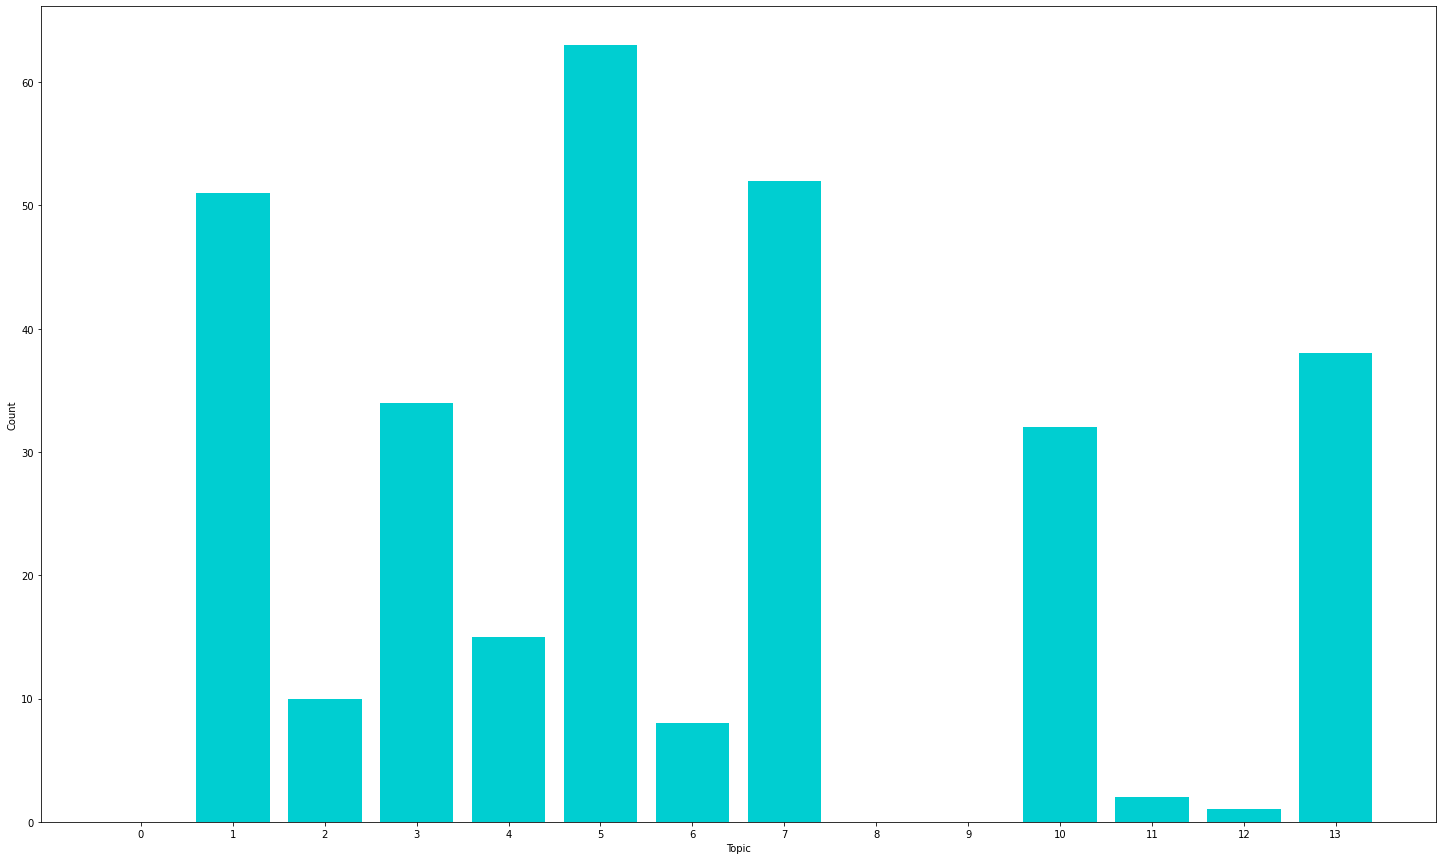

In [9]:
show_bar_graphic(get_dictionary(lda_model, bag_of_words), 'Topic', 'Count')

In [17]:
lda_model.save('../data/lda_model')

In [11]:
lda_model2 = LdaMulticore(bag_of_words, num_topics=3, id2word=id2token, passes=100, workers=6, iterations = 100, random_state=0)

In [12]:
for idx, topic in lda_model2.print_topics(-1):
    print('Topic: {}\nWords: {}\n'.format(idx, topic))

Topic: 0
Words: 0.034*"cliente" + 0.024*"experiencia" + 0.011*"individuo" + 0.009*"consumidor" + 0.009*"adoptar" + 0.008*"innovador" + 0.007*"masivo" + 0.007*"valor" + 0.006*"modelo" + 0.006*"social"

Topic: 1
Words: 0.037*"largo" + 0.036*"cola" + 0.021*"ofrecer" + 0.018*"venta" + 0.014*"cliente" + 0.014*"regla" + 0.012*"demanda" + 0.011*"nicho" + 0.010*"usuario" + 0.009*"estrategia"

Topic: 2
Words: 0.012*"red" + 0.012*"rifkin" + 0.011*"conocimiento" + 0.010*"coste" + 0.010*"industrial" + 0.009*"colaborativa" + 0.009*"ley" + 0.009*"infraestructura" + 0.007*"plataforma" + 0.007*"compartir"



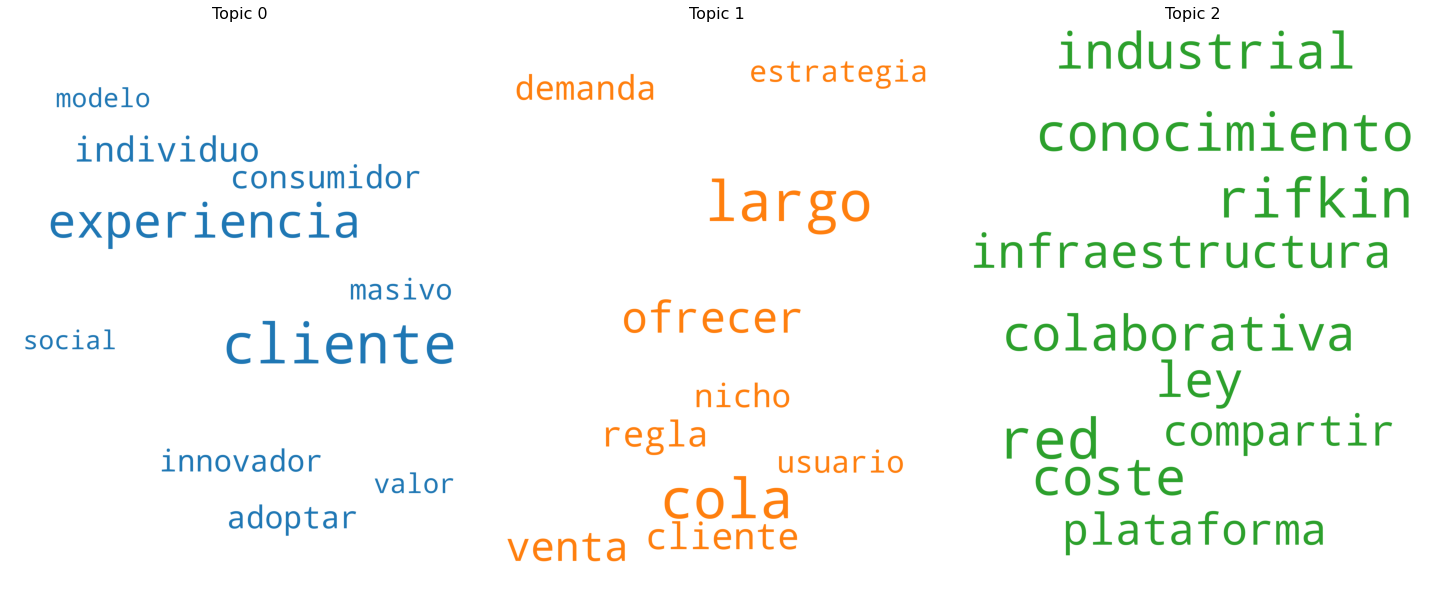

In [13]:
show_word_cloud(lda_model2, rows = 1, columns = 3)

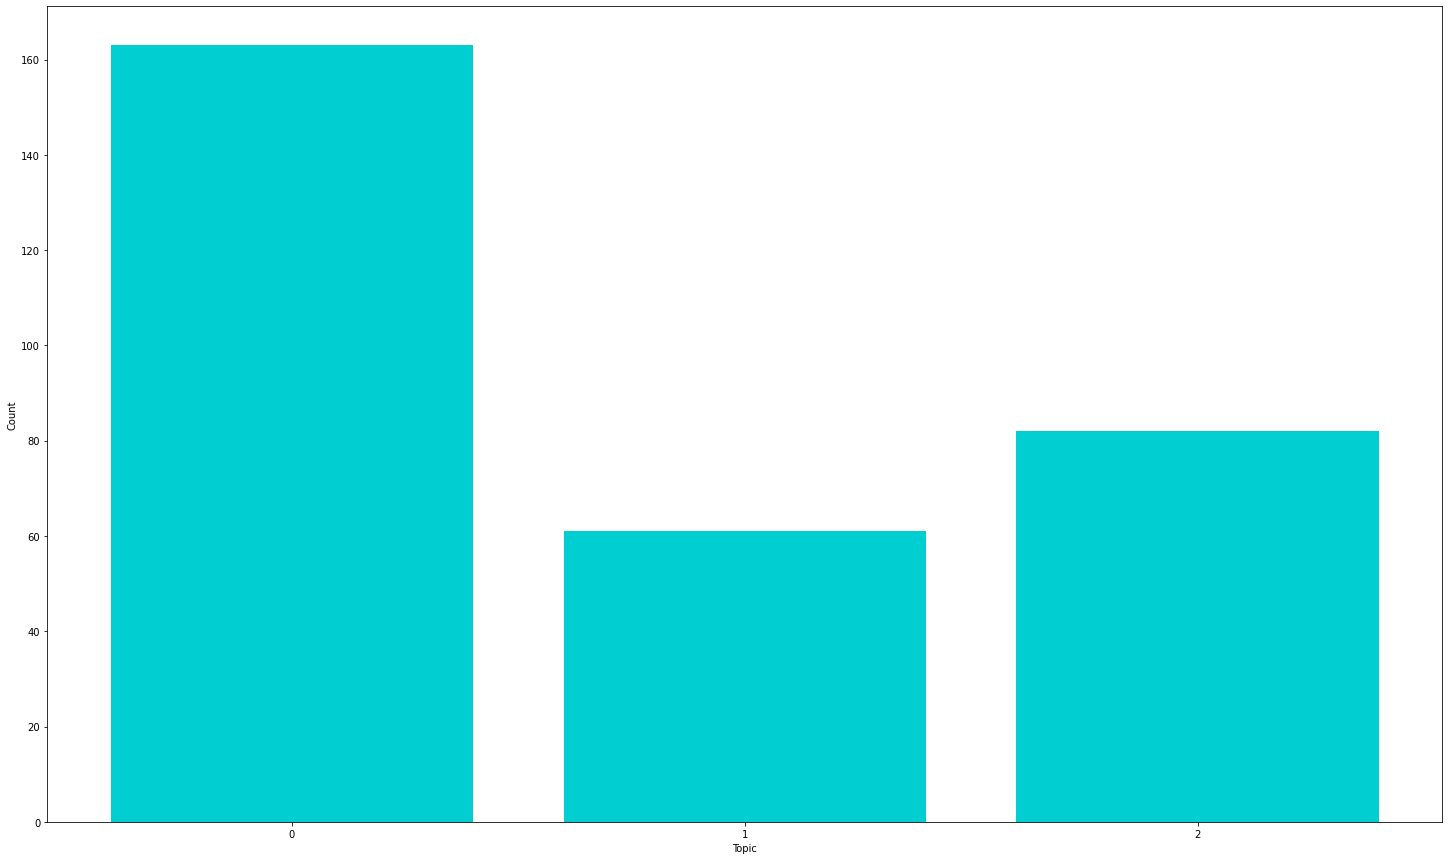

In [14]:
show_bar_graphic(get_dictionary(lda_model2, bag_of_words), 'Topic', 'Count')

In [15]:
import os
def get_test_documents():
    directory = '../test_dataset/'
    files = os.listdir(directory)

    for file in files:
        path = '{}{}'.format(directory, file)
        doc = Document(path = path)
        preprocessed_doc = doc.lemmatized_string
        bow = id2token.doc2bow(preprocessed_doc)
        result = lda_model[bow]
        print('{}: {}'.format(file, result))


get_test_documents()

Adopcion y difusion $ TP 4.doc: [(7, 0.97927296), (10, 0.013847457)]
La sociedad de costo marginal cero $ TP5.docx: [(13, 0.99566036)]
Test $ TP5 - Machine, Platform, Cloud - Marina Pross.docx: [(1, 0.17552422), (2, 0.047979806), (3, 0.052666076), (4, 0.051361974), (5, 0.041854005), (6, 0.52685016), (7, 0.03288646), (10, 0.014580953), (13, 0.04534031)]
La larga cola $ TP2.pdf: [(1, 0.9581792), (8, 0.02211865), (12, 0.015630258)]


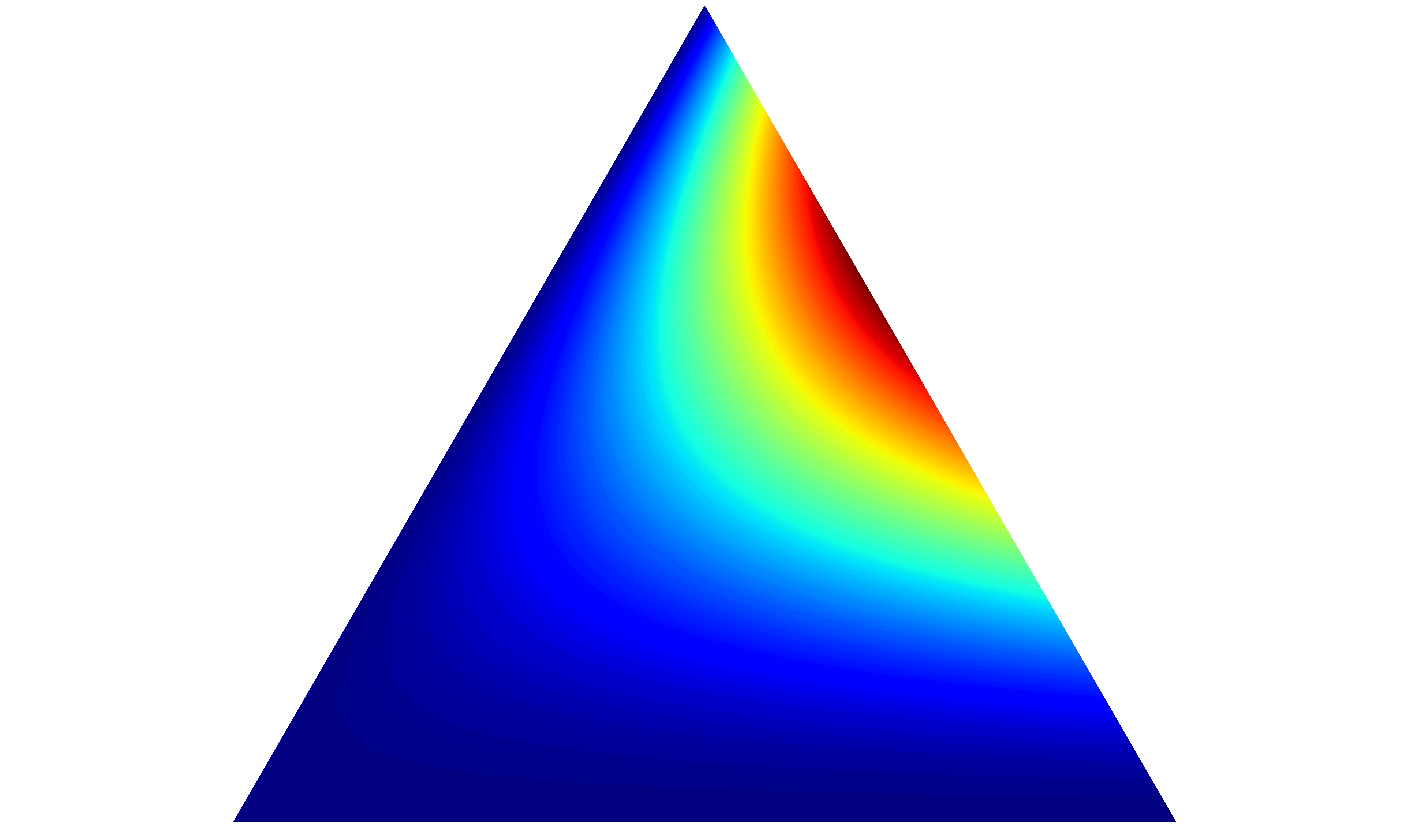

In [16]:
from util.graphics.lda_triangle import *
draw_pdf_contours(Dirichlet([1,2,3]))